In [44]:
import os

img_dir = "../data/raw/aligned"
images = os.listdir(img_dir)

print("Number of images: ", len(images))
print(images[:5])

Number of images:  4908
['0001_aligned.jpg', '0002_aligned.jpg', '0003_aligned.jpg', '0004_aligned.jpg', '0005_aligned.jpg']


In [26]:
import pandas as pd 

compound_emotion_labels = pd.read_csv(
    "../data/label.txt",
    sep=r"\s+",
    header=None,
    names=["image","compound_emotion"]
)
compound_emotion_labels.head()

image  compound_emotion
0  0001.jpg                 5
1  0002.jpg                 5
2  0003.jpg                10
3  0004.jpg                 3
4  0005.jpg                10

The naming convention in the RAF AU label file is not homogenous so we need to parse it

In [1]:
import re
def parse_au_string(au_str):
    """
    Parse RAF-AU string into structured AU features.
    Handles L/R/T/B prefixes correctly.
    """
    if pd.isna(au_str):
        return {}

    aus = str(au_str).split("+")
    parsed = {}

    for au in aus:
        au = au.strip()
        if not au:
            continue

        # Regex: optional prefix + AU number
        match = re.match(r"([LRBT])?(\d+)", au, re.IGNORECASE)
        if not match:
            continue

        prefix, au_num = match.groups()

        if prefix:
            parsed[f"AU{au_num}_{prefix.upper()}"] = 1
        else:
            parsed[f"AU{au_num}"] = 1

    return parsed

In [2]:
import pandas as pd

au_df = pd.read_csv(
    "../data/RAFAU_label.txt",
    sep=r"\s+",
    header=None,
    names=["image", "au_raw"]
)

au_parsed = au_df["au_raw"].apply(parse_au_string)

au_features = pd.DataFrame(au_parsed.tolist()).fillna(0)

au_features["image"] = au_df["image"]

au_features.head()
print(au_features.columns)

Index(['AU1', 'AU4', 'AU25', 'AU9', 'AU12', 'AU26', 'AU43', 'AU12_L', 'AU24',
       'AU5', 'AU6', 'AU7', 'AU2', 'AU22', 'AU20', 'AU10_L', 'AU15', 'AU17',
       'AU14', 'AU18', 'AU27', 'AU10', 'AU16', 'AU23', 'AU7_L', 'AU29',
       'AU1_R', 'AU2_R', 'AU21', 'AU22_B', 'AU28', 'AU5_L', 'AU10_R', 'AU12_R',
       'AU20_R', 'AU24_T', 'AU14_R', 'AU1_L', 'AU2_L', 'AU15_L', 'AU20_L',
       'AU39', 'AU14_L', 'AU9_R', 'AU28_T', 'AU6_R', 'AU23_T', 'AU28_B',
       'AU22_T', 'AU18_L', 'AU19', 'AU5_R', 'AU6_L', 'AU43_L', 'AU32', 'AU34',
       'AU35', 'AU4_L', 'AU43_R', 'AU9_L', 'AU30', 'AU23_B', 'AU18_R',
       'AU18_B', 'AU35_R', 'AU18_T', 'AU7_R', 'AU33', 'AU4_R', 'AU24_B',
       'AU34_L', 'image'],
      dtype='object')


Renaming the images' files from "number_aligned.jpg" to "number.jpg" to reflect the naming convention in the labels' files

In [45]:
for filename in os.listdir(img_dir):
    if filename.endswith("_aligned.jpg"):
        old_path = os.path.join(img_dir, filename)
        new_name = filename.replace("_aligned.jpg",".jpg")
        new_path = os.path.join(img_dir, new_name)

        os.rename(old_path, new_path)

## Image Exploration

Checking Images' sizes

In [24]:
sizes = []
for filename in os.listdir(img_dir):
    with Image.open(os.path.join(img_dir, filename)) as img:
        if img.size not in sizes :
            sizes.append(img.size)
print(sizes)

[(100, 100)]


## Exploring the Compound Emotion labels 

Verifying that all images have their corresponding label

In [13]:
missing = [
    x for x in compound_emotion_labels["image"]
    if not os.path.exists(os.path.join(img_dir, x))
]

print("Missing images:", len(missing))

Missing images: 0


In [14]:
del missing

Exploring class distribution

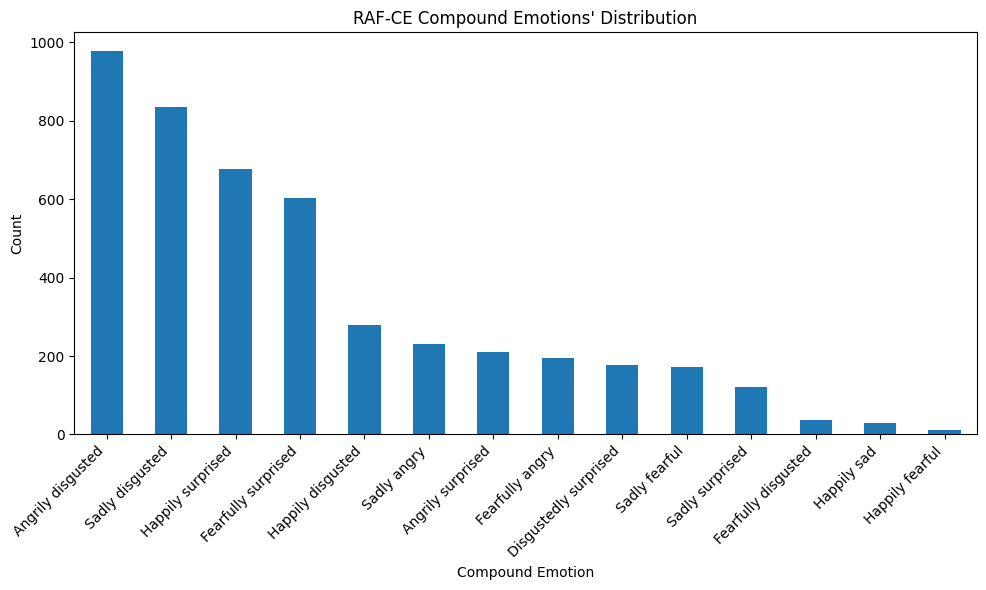

In [17]:
import matplotlib.pyplot as plt
emotion_map = {
    0: 'Happily surprised',
    1: 'Happily disgusted',
    2: 'Sadly fearful',
    3: 'Sadly angry',
    4: 'Sadly surprised',
    5: 'Sadly disgusted',
    6: 'Fearfully angry',
    7: 'Fearfully surprised',
    8: 'Fearfully disgusted',
    9: 'Angrily surprised',
    10: 'Angrily disgusted',
    11: 'Disgustedly surprised',
    12: 'Happily fearful',
    13: 'Happily sad'
}
counts = compound_emotion_labels["compound_emotion"].value_counts()
counts.index = counts.index.map(emotion_map)
counts.plot(kind="bar", figsize=(10,6))
plt.title("RAF-CE Compound Emotions' Distribution")
plt.xlabel("Compound Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45,ha="right")
plt.tight_layout()
plt.show()

In [18]:
print(counts)

compound_emotion
Angrily disgusted        977
Sadly disgusted          835
Happily surprised        676
Fearfully surprised      603
Happily disgusted        279
Sadly angry              230
Angrily surprised        210
Fearfully angry          195
Disgustedly surprised    177
Sadly fearful            171
Sadly surprised          120
Fearfully disgusted       36
Happily sad               29
Happily fearful           11
Name: count, dtype: int64


In [19]:
del counts

Visualizing samples

In [20]:
from PIL import Image
import random

def show_samples(class_id, n=5):
    subset = compound_emotion_labels[compound_emotion_labels["compound_emotion"] == class_id]
    imgs = subset.sample(n)["image"]

    figs, axs = plt.subplots(1, n, figsize=(15,3))
    for ax, img in zip(axs, imgs):
        image = Image.open(os.path.join(img_dir, img))
        ax.imshow(image)
        ax.axis("off")
    plt.show()

Happily surprised


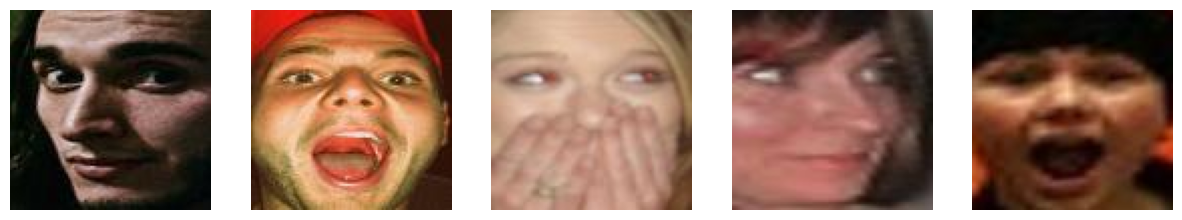

Happily disgusted


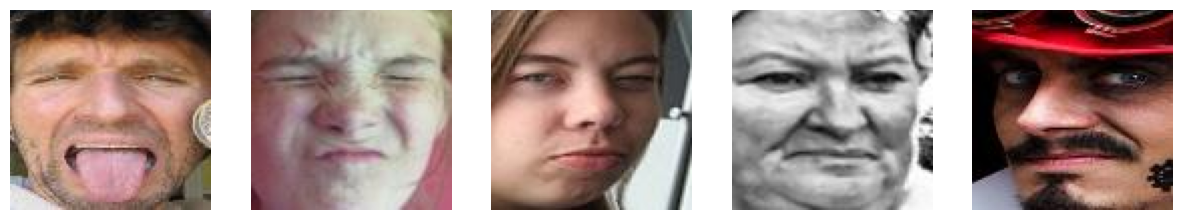

Sadly fearful


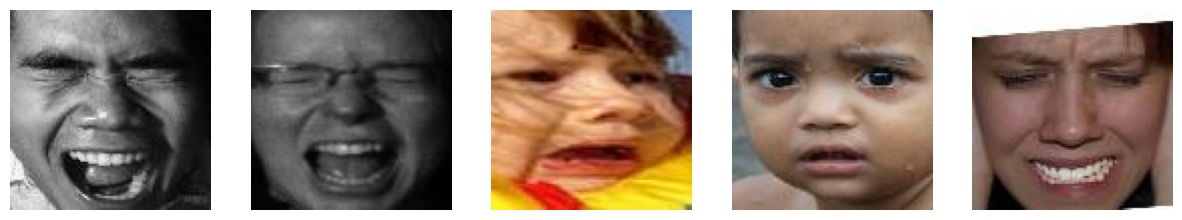

Sadly angry


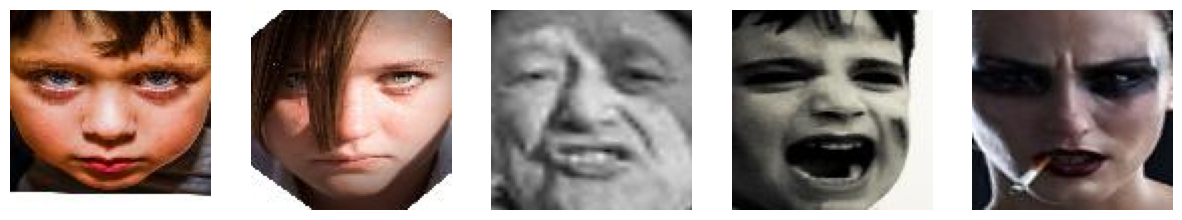

Sadly surprised


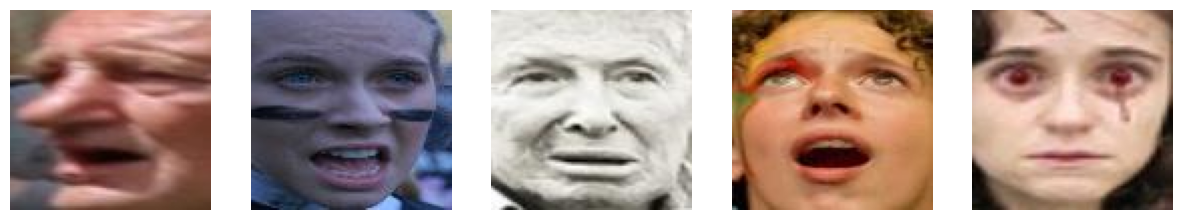

Sadly disgusted


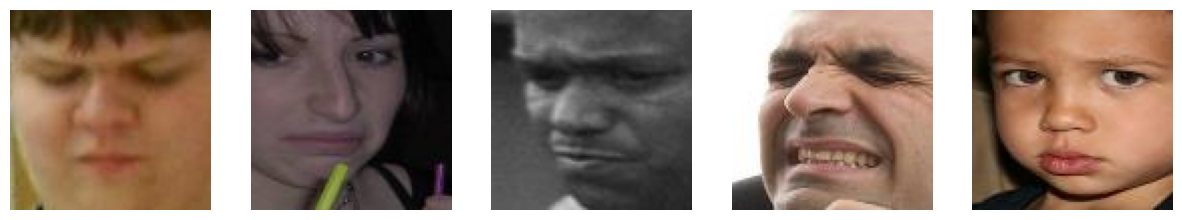

Fearfully angry


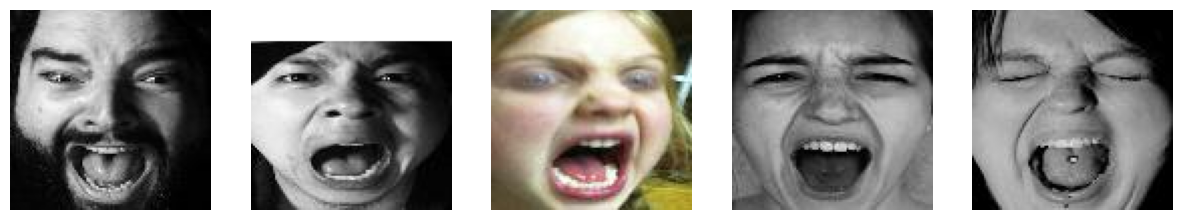

Fearfully surprised


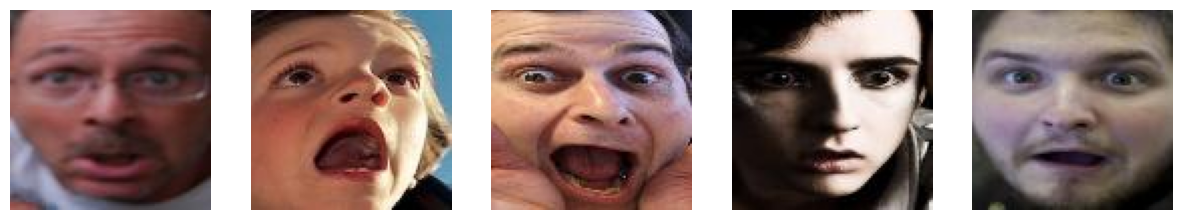

Fearfully disgusted


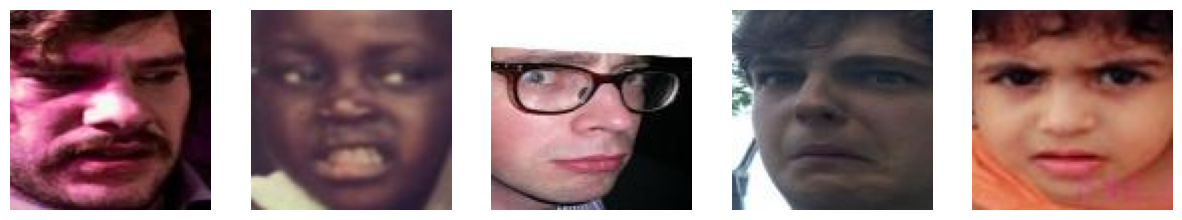

Angrily surprised


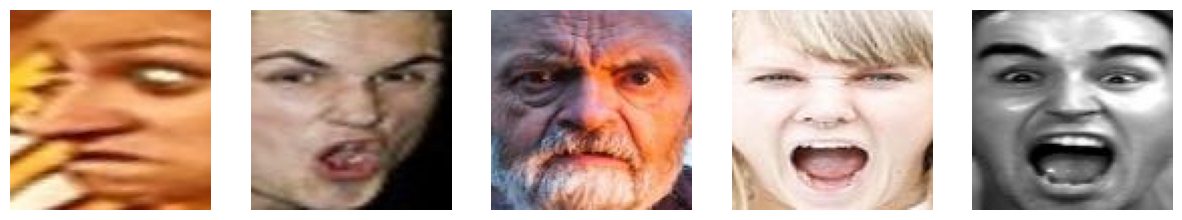

Angrily disgusted


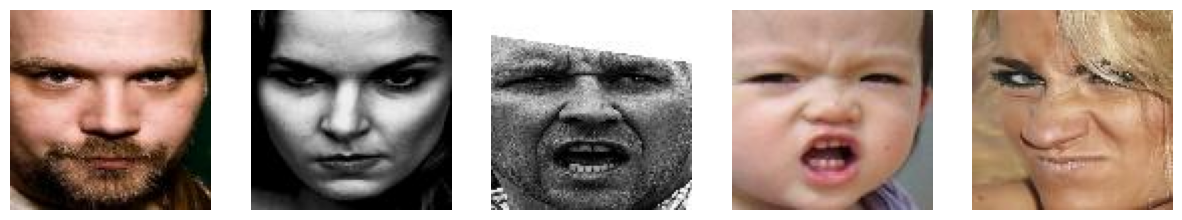

Disgustedly surprised


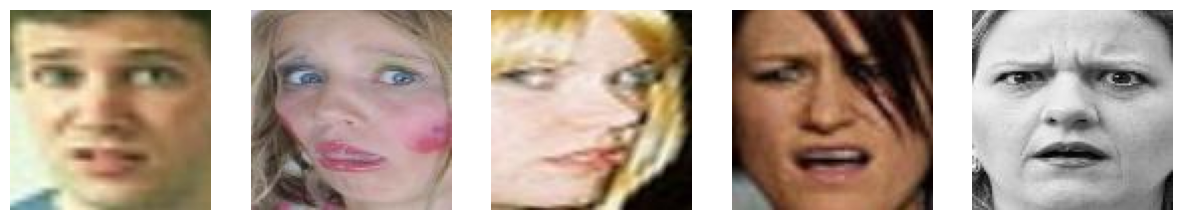

Happily fearful


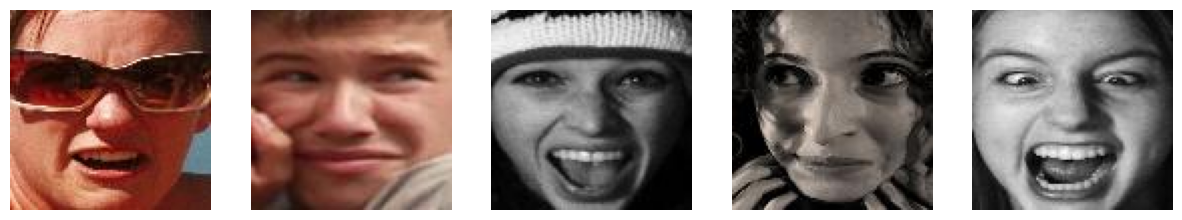

Happily sad


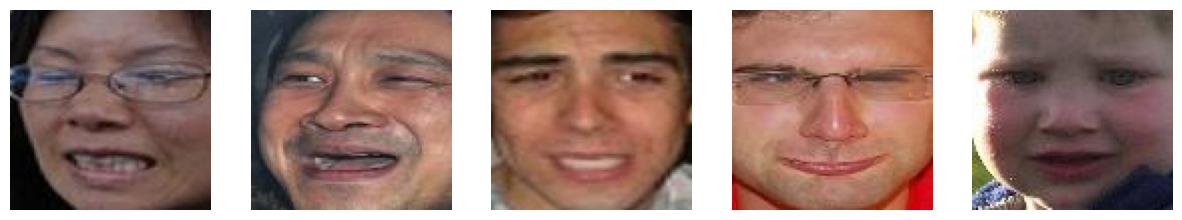

In [22]:
for i in range(14):
    print(emotion_map[i])
    show_samples(i)

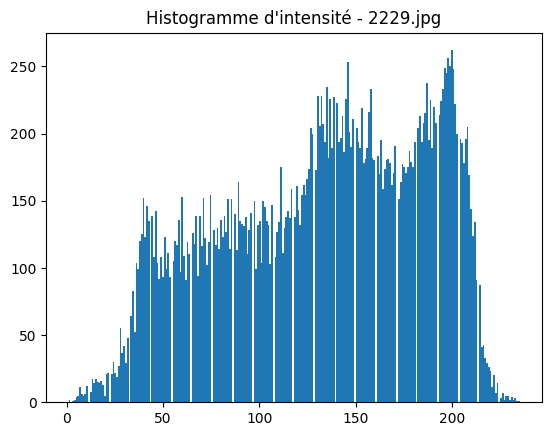

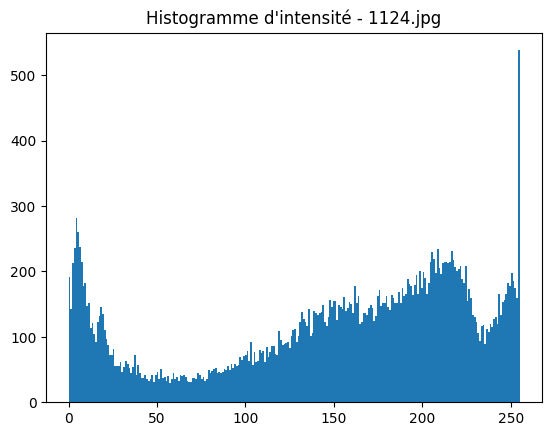

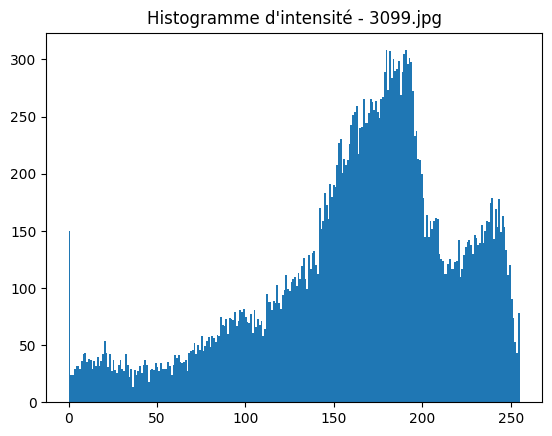

In [27]:
import numpy as np
def plot_intensity_histogram(df, sample_images=3):
    sampled_paths = df["image"].sample(min(sample_images, len(df)))
    for path in sampled_paths:
        img = np.array(Image.open(img_dir+"/"+path))
        plt.hist(img.ravel(), bins=256)
        plt.title(f"Histogramme d'intensité - {path}")
        plt.show()
plot_intensity_histogram(df=compound_emotion_labels)

Les images ne sont pas toutes uniformes en luminosité et contraste → le modèle pourrait rencontrer des difficultés si on n’applique pas de normalisation.

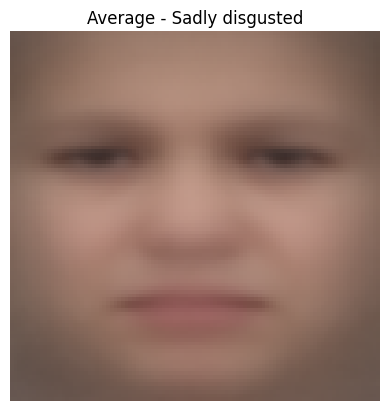

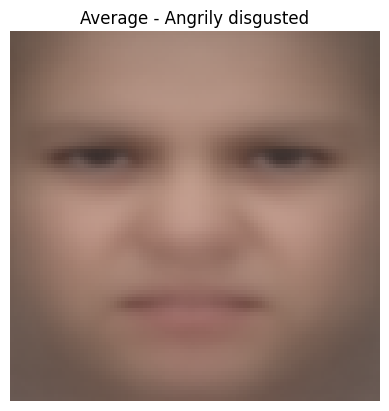

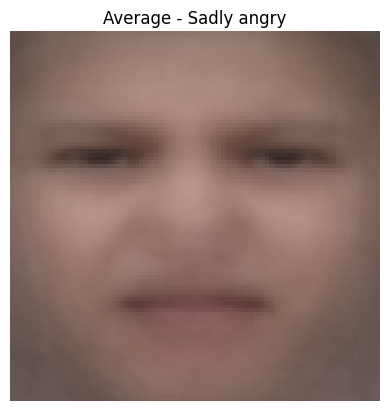

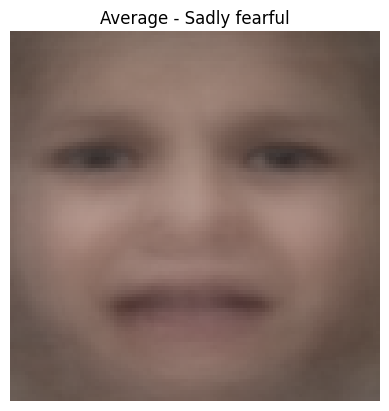

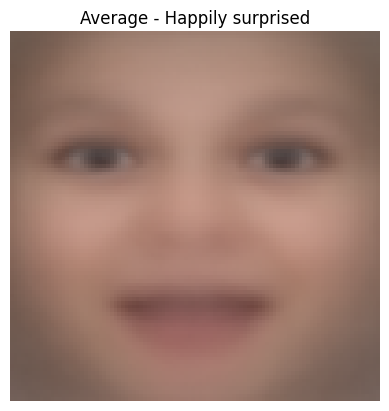

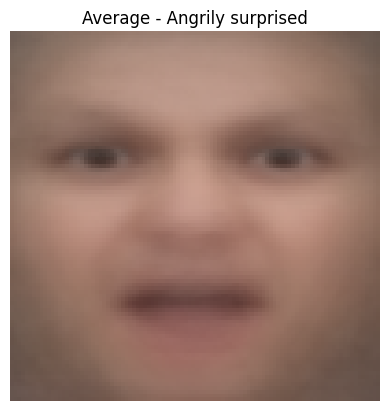

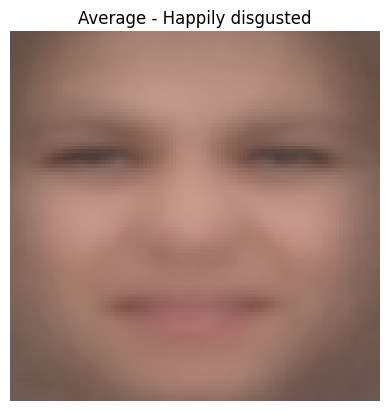

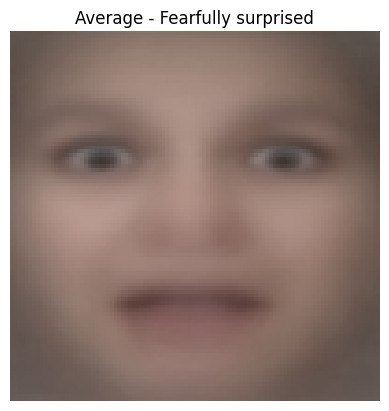

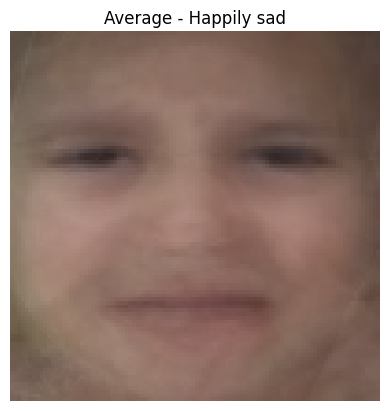

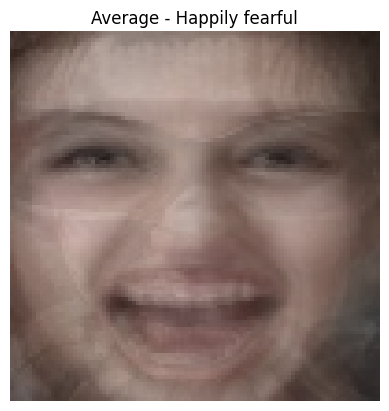

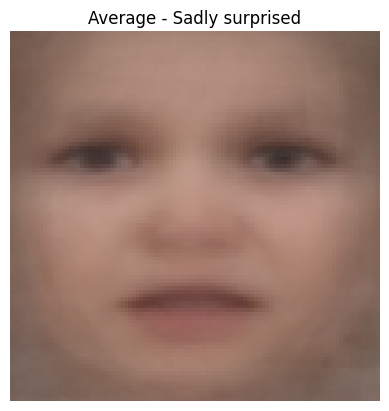

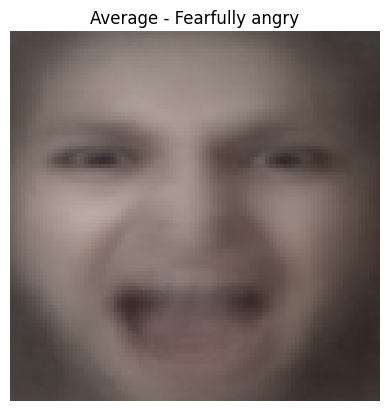

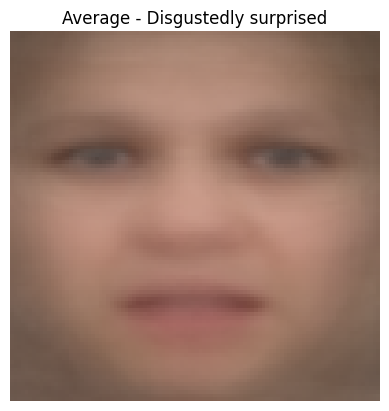

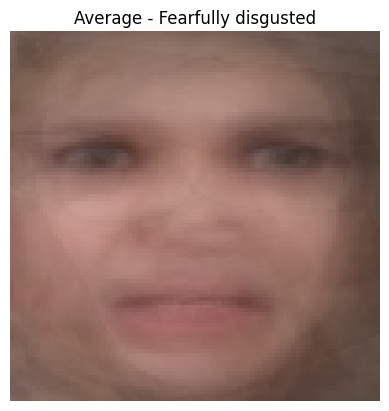

In [30]:

for label in compound_emotion_labels['compound_emotion'].unique():
    imgs = np.array([plt.imread(img_dir+"/"+p) for p in compound_emotion_labels[compound_emotion_labels['compound_emotion']==label]['image']])
    mean_face = imgs.mean(axis=0)
    plt.imshow(mean_face / 255.0, cmap='gray')
    plt.title(f"Average - {emotion_map[label]}")
    plt.axis('off')
    plt.show()

This confirms what has been already hypothesized regarding which classes are similar and which classes are less in frequency and need to be augmented.

## Exploring the AUs

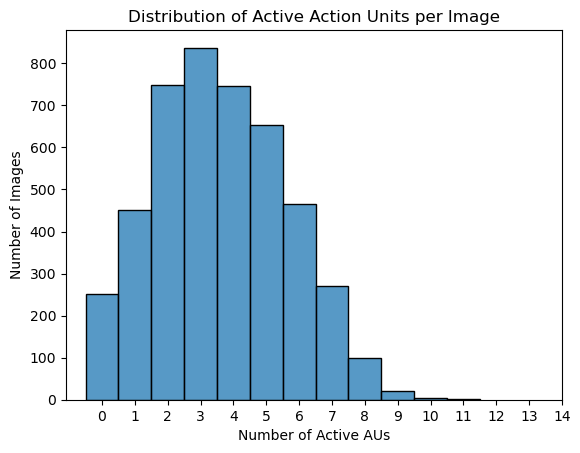

In [3]:
import seaborn as sns 
import matplotlib.pyplot as plt
au_columns = [col for col in au_features.columns if col != "image"]
au_counts_per_image = au_features[au_columns].sum(axis=1)
ax = sns.histplot(au_counts_per_image, bins=range(0, 15), discrete=True)
ax.bar_label(ax.containers[0])
plt.title("Distribution of Active Action Units per Image")
plt.xlabel("Number of Active AUs")
plt.ylabel("Number of Images")
plt.xticks(range(0, 15))
plt.show()

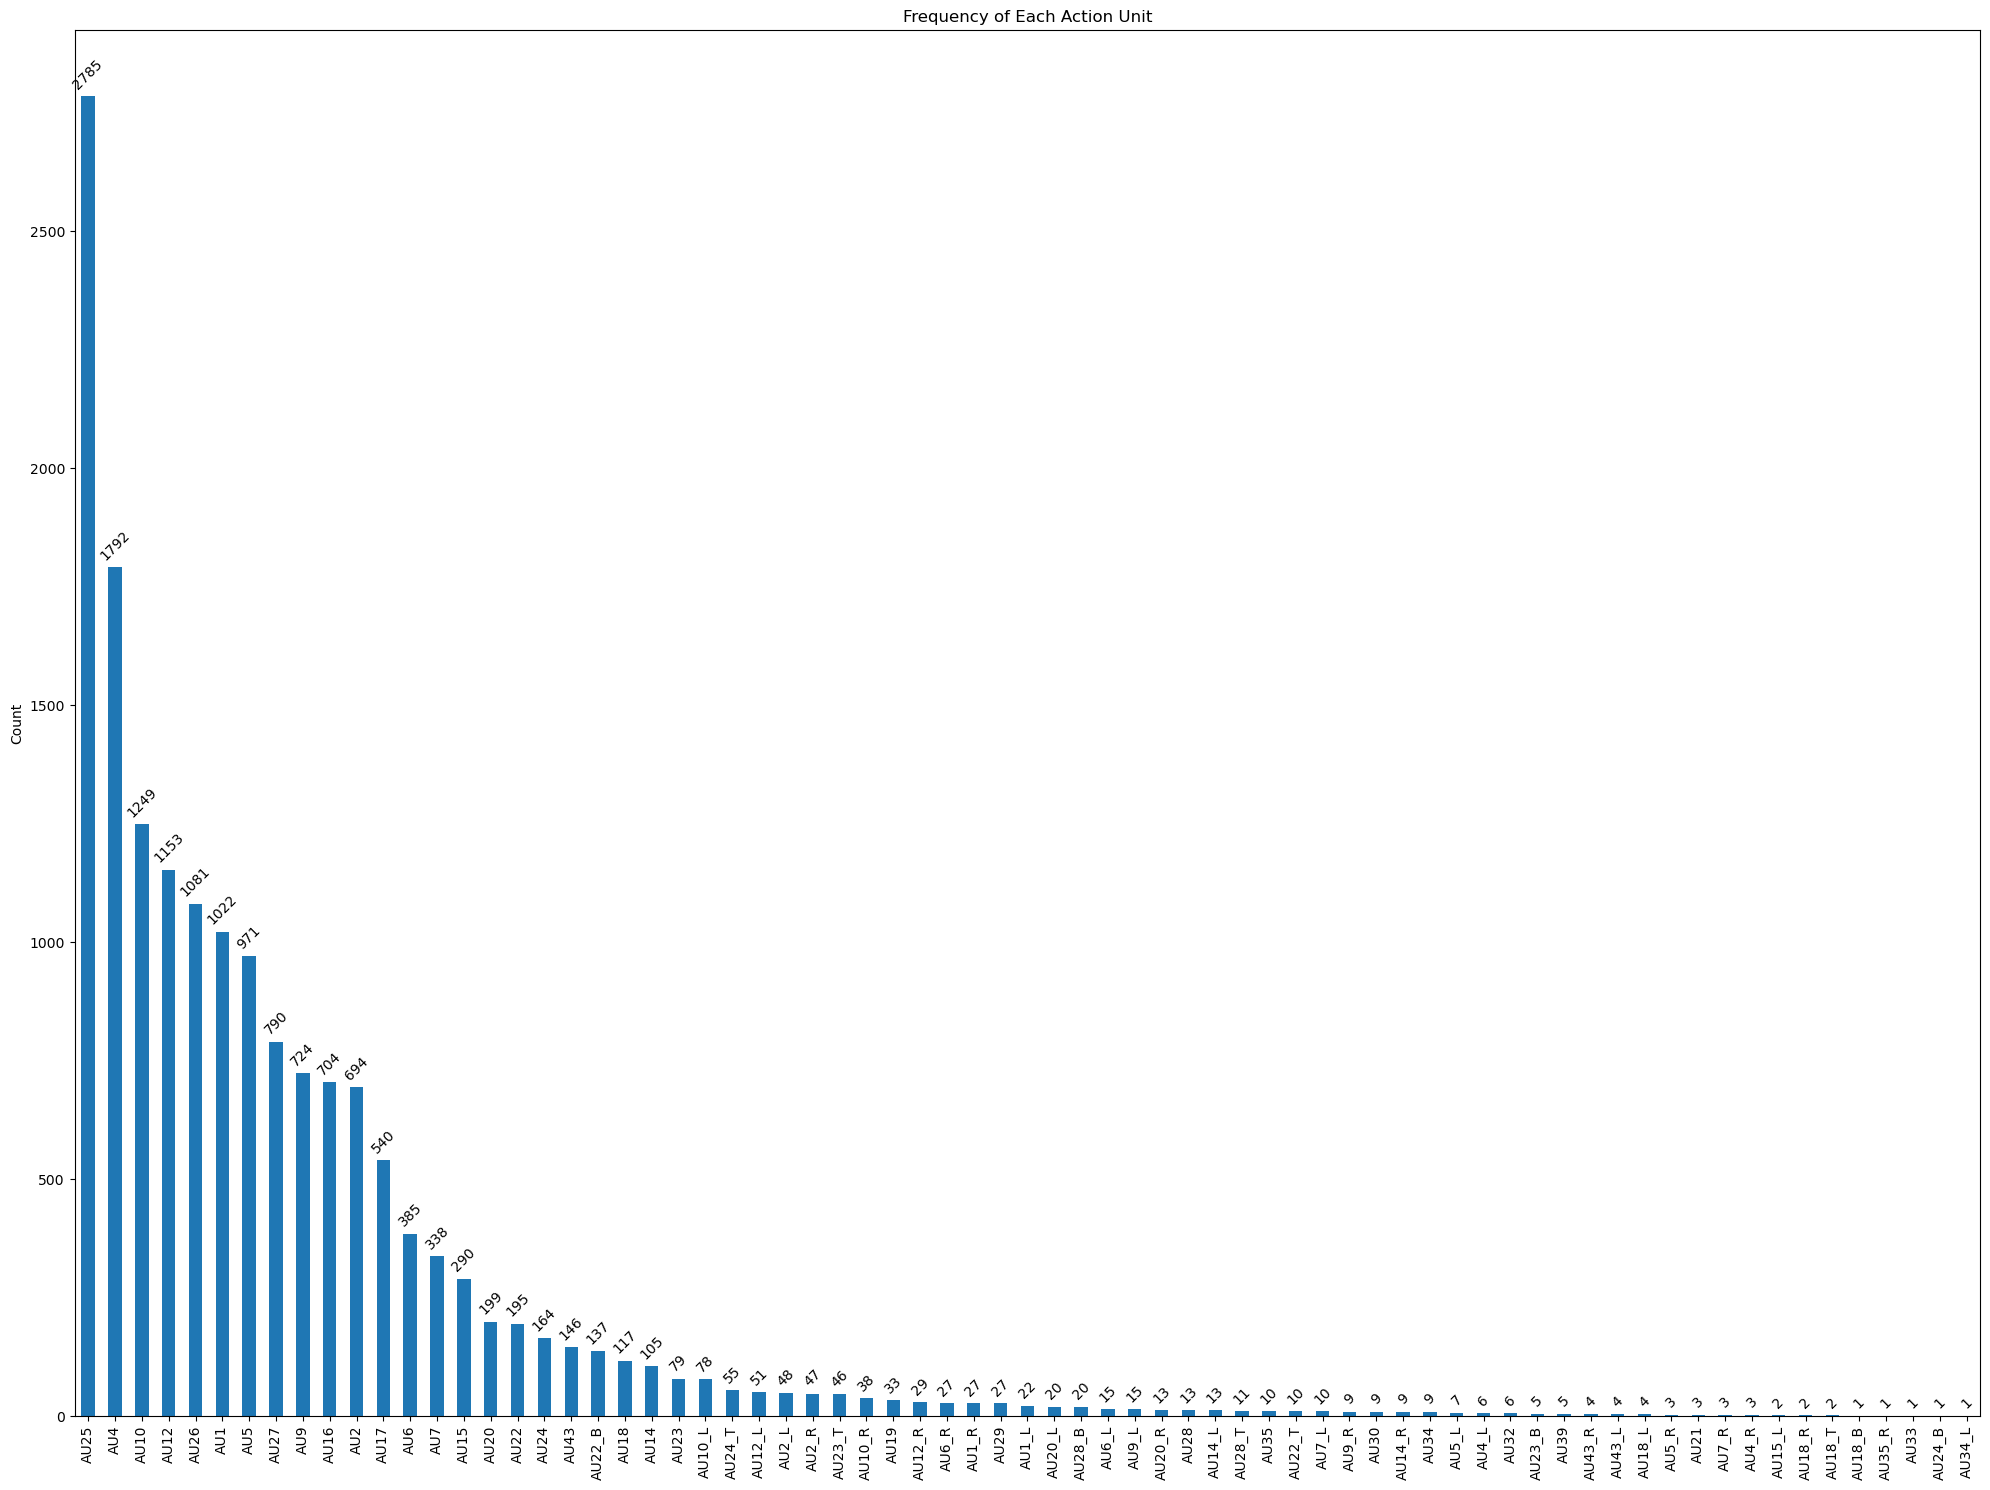

In [4]:
plt.figure(figsize=(20,15))
au_frequencies = au_features[au_columns].sum().sort_values(ascending=False)

ax = au_frequencies.plot(kind="bar")

ax.bar_label(ax.containers[0], padding=3, rotation=45)

plt.title("Frequency of Each Action Unit")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

There is a problem in the image 0458.jpg : The label contains AD19 that doesn't correspond to anything in the documentation so the assumption that it is simply 19 has been made and the dataframe was updated accordingly; In the documentation there is no mention of AD19. AU19 corresponds to visible tongue (R to right T to top B to Bottom L to left) so i made the assumption that AD19 simply corresponds to 19.

In [ ]:
print(au_features[au_features["image"]=="0485.jpg"]["AU19"])

435    0.0
Name: AU19, dtype: float64


In [ ]:
au_features.loc[au_features["image"] == "0485.jpg", "AU19"] = 1
print(au_features[au_features["image"]=="0485.jpg"]["AU19"])

435    1.0
Name: AU19, dtype: float64


According to the plot of the frequency of each action unit : some AUs that have T, B, R or L spec are too sparse and data augmentation can only do so much. Consequently, we will include the granular AUs that have little counts into regular AUs. 

In [5]:
# Colonnes AU (sans image)
au_cols = [c for c in au_features.columns if c != "image"]

# Dictionnaire : AU_base -> [colonnes associées]
au_groups = {}

for col in au_cols:
    # Extrait le numéro de l'AU (AU12, AU12_L → 12)
    match = re.match(r"AU(\d+)", col)
    if not match:
        continue

    au_num = match.group(1)
    au_groups.setdefault(au_num, []).append(col)

In [6]:
records = []

for au_num, cols in au_groups.items():
    global_col = f"AU{au_num}"

    global_count = (
        au_features[global_col].sum()
        if global_col in au_features.columns
        else 0
    )

    for col in cols:
        if col == global_col:
            continue

        records.append({
            "AU": f"AU{au_num}",
            "Variant": col,
            "Global_count": global_count,
            "Variant_count": au_features[col].sum(),
            "Variant_ratio_to_global": (
                au_features[col].sum() / global_count
                if global_count > 0 else 0
            )
        })

In [7]:
au_comparison_df = pd.DataFrame(records)
au_comparison_df.sort_values(
    by=["AU", "Variant_count"],
    ascending=[True, False],
    inplace=True
)

au_comparison_df

AU Variant  Global_count  Variant_count  Variant_ratio_to_global
0    AU1   AU1_R        1022.0           27.0                 0.026419
1    AU1   AU1_L        1022.0           22.0                 0.021526
24  AU10  AU10_L        1249.0           78.0                 0.062450
25  AU10  AU10_R        1249.0           38.0                 0.030424
6   AU12  AU12_L        1153.0           51.0                 0.044232
7   AU12  AU12_R        1153.0           29.0                 0.025152
28  AU14  AU14_L         105.0           13.0                 0.123810
27  AU14  AU14_R         105.0            9.0                 0.085714
26  AU15  AU15_L         290.0            2.0                 0.006897
29  AU18  AU18_L         117.0            4.0                 0.034188
30  AU18  AU18_R         117.0            2.0                 0.017094
32  AU18  AU18_T         117.0            2.0                 0.017094
31  AU18  AU18_B         117.0            1.0                 0.008547
19   AU2   AU2_L         694.0           48.0                 0.069164
18   AU2   AU2_R         694.0           47.0                 0.067723
23  AU20  AU20_L         199.0           20.0                 0.100503
22  AU20  AU20_R         199.0           13.0                 0.065327
20  AU22  AU22_B         195.0          137.0                 0.702564
21  AU22  AU22_T         195.0           10.0                 0.051282
33  AU23  AU23_T          79.0           46.0                 0.582278
34  AU23  AU23_B          79.0            5.0                 0.063291
10  AU24  AU24_T         164.0           55.0                 0.335366
11  AU24  AU24_B         164.0            1.0                 0.006098
36  AU28  AU28_B          13.0           20.0                 1.538462
35  AU28  AU28_T          13.0           11.0                 0.846154
37  AU34  AU34_L           9.0            1.0                 0.111111
38  AU35  AU35_R          10.0            1.0                 0.100000
2    AU4   AU4_L        1792.0            6.0                 0.003348
3    AU4   AU4_R        1792.0            3.0                 0.001674
8   AU43  AU43_L         146.0            4.0                 0.027397
9   AU43  AU43_R         146.0            4.0                 0.027397
12   AU5   AU5_L         971.0            7.0                 0.007209
13   AU5   AU5_R         971.0            3.0                 0.003090
14   AU6   AU6_R         385.0           27.0                 0.070130
15   AU6   AU6_L         385.0           15.0                 0.038961
16   AU7   AU7_L         338.0           10.0                 0.029586
17   AU7   AU7_R         338.0            3.0                 0.008876
5    AU9   AU9_L         724.0           15.0                 0.020718
4    AU9   AU9_R         724.0            9.0                 0.012431

We fuse granular AUs (L/R/T/B) into their corresponding global AU when their occurrence frequency represents less than 5% of the global AU count, as such sparse variants do not provide sufficient data for reliable learning and data augmentation alone is insufficient to compensate for this imbalance.

In [8]:
THRESHOLD = 0.05

au_comparison_df["to_fuse"] = au_comparison_df["Variant_ratio_to_global"] < THRESHOLD

In [9]:
variants_to_fuse = au_comparison_df.loc[
    au_comparison_df["to_fuse"], "Variant"
].unique()
def get_parent_au(variant):
    return variant.split("_")[0]
labels_fused_df = au_features.copy()

for variant in variants_to_fuse:
    parent_au = get_parent_au(variant)

    # sécurité : vérifier que les colonnes existent
    if variant in labels_fused_df.columns and parent_au in labels_fused_df.columns:
        labels_fused_df[parent_au] = (
            labels_fused_df[[parent_au, variant]].max(axis=1)
        )

labels_fused_df.drop(
    columns=[v for v in variants_to_fuse if v in labels_fused_df.columns],
    inplace=True
)
print("Before fusion:", au_features.shape[1])
print("After fusion :", labels_fused_df.shape[1])

Before fusion: 72
After fusion : 50


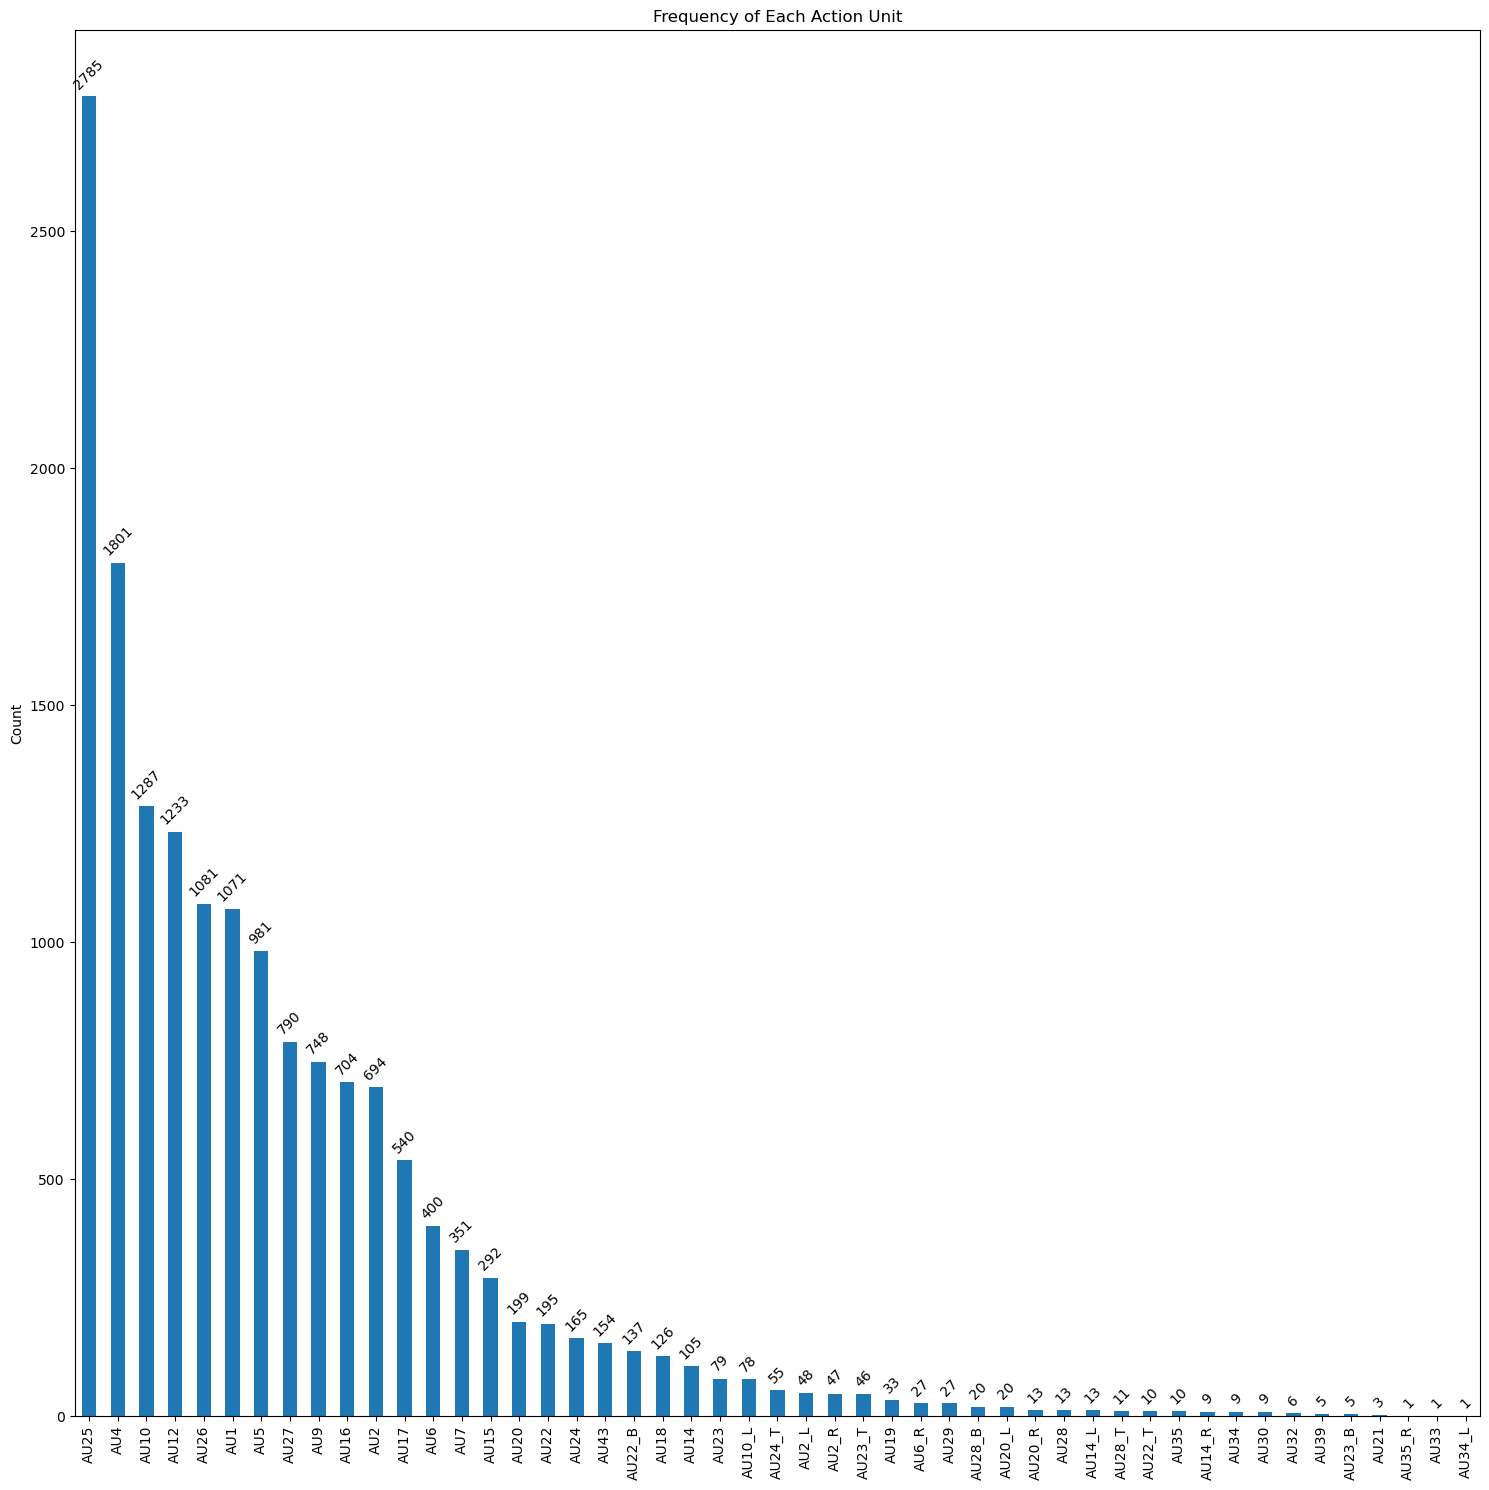

In [10]:
plt.figure(figsize=(15,15))
au_cols = labels_fused_df.columns.drop("image")

au_frequencies = labels_fused_df[au_cols].sum().sort_values(ascending=False)

ax = au_frequencies.plot(kind="bar")

ax.bar_label(ax.containers[0], padding=3, rotation=45)

plt.title("Frequency of Each Action Unit")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

There are still granular AUs with too few count that haven't been fused because the parent AU is small in count so we are going to add an absolute threshold

In [11]:
ABS_THRESHOLD = 40
au_comparison_df["to_fuse"] = (
    (au_comparison_df["Variant_ratio_to_global"] < 0.05)
    | (au_comparison_df["Variant_count"] < ABS_THRESHOLD)
)
variants_to_fuse = au_comparison_df.loc[
    au_comparison_df["to_fuse"], "Variant"
].unique()
def get_parent_au(variant):
    return variant.split("_")[0]

labels_fused_df = au_features.copy()

for variant in variants_to_fuse:
    parent_au = get_parent_au(variant)

    # sécurité : vérifier que les colonnes existent
    if variant in labels_fused_df.columns and parent_au in labels_fused_df.columns:
        labels_fused_df[parent_au] = (
            labels_fused_df[[parent_au, variant]].max(axis=1)
        )

labels_fused_df.drop(
    columns=[v for v in variants_to_fuse if v in labels_fused_df.columns],
    inplace=True
)
print("Before fusion:", au_features.shape[1])
print("After fusion :", labels_fused_df.shape[1])

Before fusion: 72
After fusion : 39


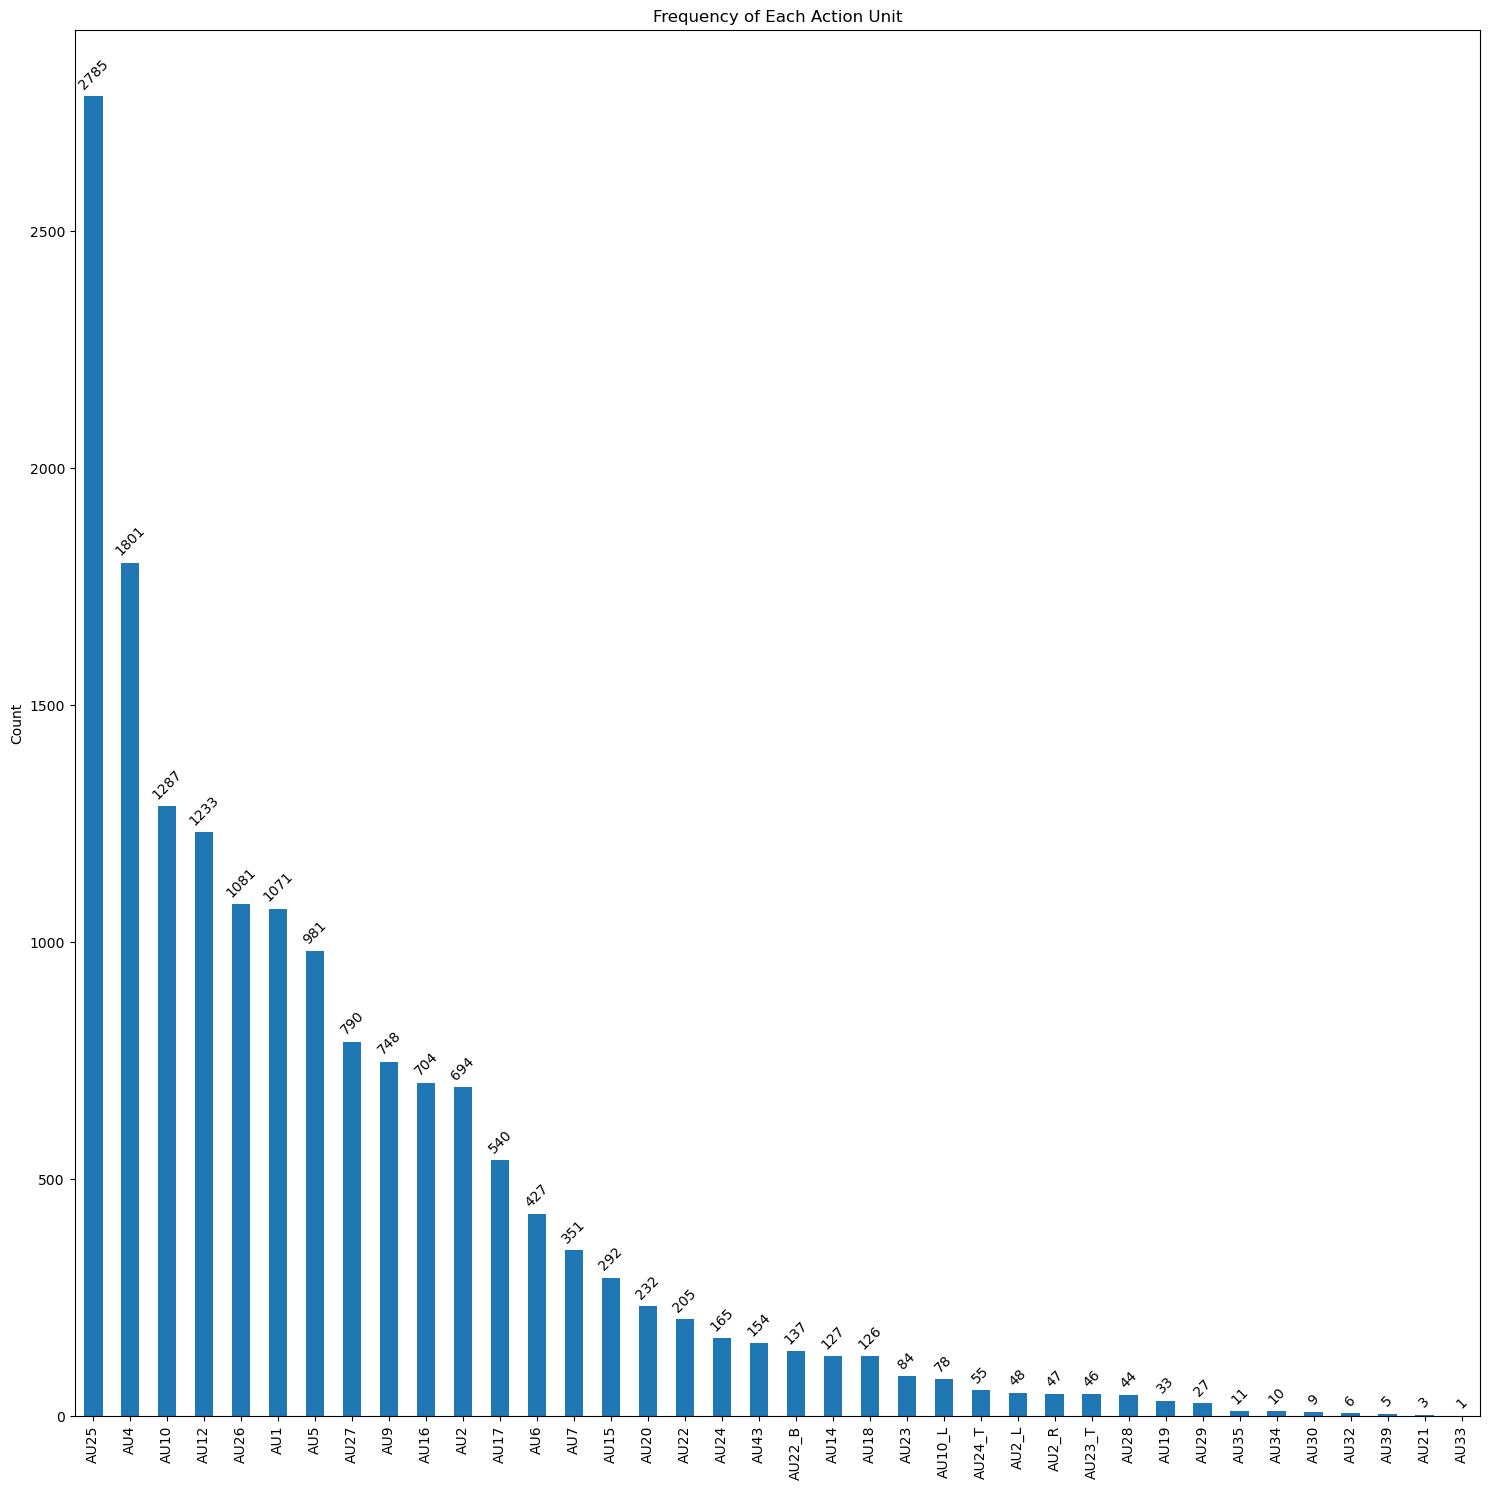

In [12]:
plt.figure(figsize=(15,15))
au_cols = labels_fused_df.columns.drop("image")

au_frequencies = labels_fused_df[au_cols].sum().sort_values(ascending=False)

ax = au_frequencies.plot(kind="bar")

ax.bar_label(ax.containers[0], padding=3, rotation=45)

plt.title("Frequency of Each Action Unit")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

These AUs are way too rare : AU19 (34), AU29 (27), AU35 (11), AU34 (10), AU30 (9), AU32 (6), AU39 (5), AU21 (3), AU33 (1) so it will be preferable to drop them 

In [13]:
rare_aus = ['AU19','AU29','AU35','AU34','AU30','AU32','AU39','AU21','AU33']

# Keep only columns that are not in rare_aus
au_cols_clean = [col for col in au_cols if col not in rare_aus]

# Create a new dataframe with only clean AU columns
labels_fused_clean_df = labels_fused_df[au_cols_clean].copy()

# Check sums per AU
print(labels_fused_clean_df.sum().sort_values(ascending=False))

AU25      2785.0
AU4       1801.0
AU10      1287.0
AU12      1233.0
AU26      1081.0
AU1       1071.0
AU5        981.0
AU27       790.0
AU9        748.0
AU16       704.0
AU2        694.0
AU17       540.0
AU6        427.0
AU7        351.0
AU15       292.0
AU20       232.0
AU22       205.0
AU24       165.0
AU43       154.0
AU22_B     137.0
AU14       127.0
AU18       126.0
AU23        84.0
AU10_L      78.0
AU24_T      55.0
AU2_L       48.0
AU2_R       47.0
AU23_T      46.0
AU28        44.0
dtype: float64


In [14]:
all_zero_rows = labels_fused_clean_df[(labels_fused_clean_df == 0).all(axis=1)]

print(f"Number of rows with all 0s: {len(all_zero_rows)}")

# Optional: view a few examples
print(all_zero_rows.head())

Number of rows with all 0s: 258
    AU1  AU4  AU25  AU9  AU12  AU26  AU43  AU24  AU5  AU6  ...  AU27  AU10  \
3   0.0  0.0   0.0  0.0   0.0   0.0   0.0   0.0  0.0  0.0  ...   0.0   0.0   
4   0.0  0.0   0.0  0.0   0.0   0.0   0.0   0.0  0.0  0.0  ...   0.0   0.0   
26  0.0  0.0   0.0  0.0   0.0   0.0   0.0   0.0  0.0  0.0  ...   0.0   0.0   
31  0.0  0.0   0.0  0.0   0.0   0.0   0.0   0.0  0.0  0.0  ...   0.0   0.0   
37  0.0  0.0   0.0  0.0   0.0   0.0   0.0   0.0  0.0  0.0  ...   0.0   0.0   

    AU16  AU23  AU2_R  AU22_B  AU28  AU24_T  AU2_L  AU23_T  
3    0.0   0.0    0.0     0.0   0.0     0.0    0.0     0.0  
4    0.0   0.0    0.0     0.0   0.0     0.0    0.0     0.0  
26   0.0   0.0    0.0     0.0   0.0     0.0    0.0     0.0  
31   0.0   0.0    0.0     0.0   0.0     0.0    0.0     0.0  
37   0.0   0.0    0.0     0.0   0.0     0.0    0.0     0.0  

[5 rows x 29 columns]


In [15]:
labels_fused_clean_df = labels_fused_clean_df[(labels_fused_clean_df != 0).any(axis=1)].reset_index(drop=True)
print(f"Dataset size after removing empty rows: {len(labels_fused_clean_df)}")

Dataset size after removing empty rows: 4291


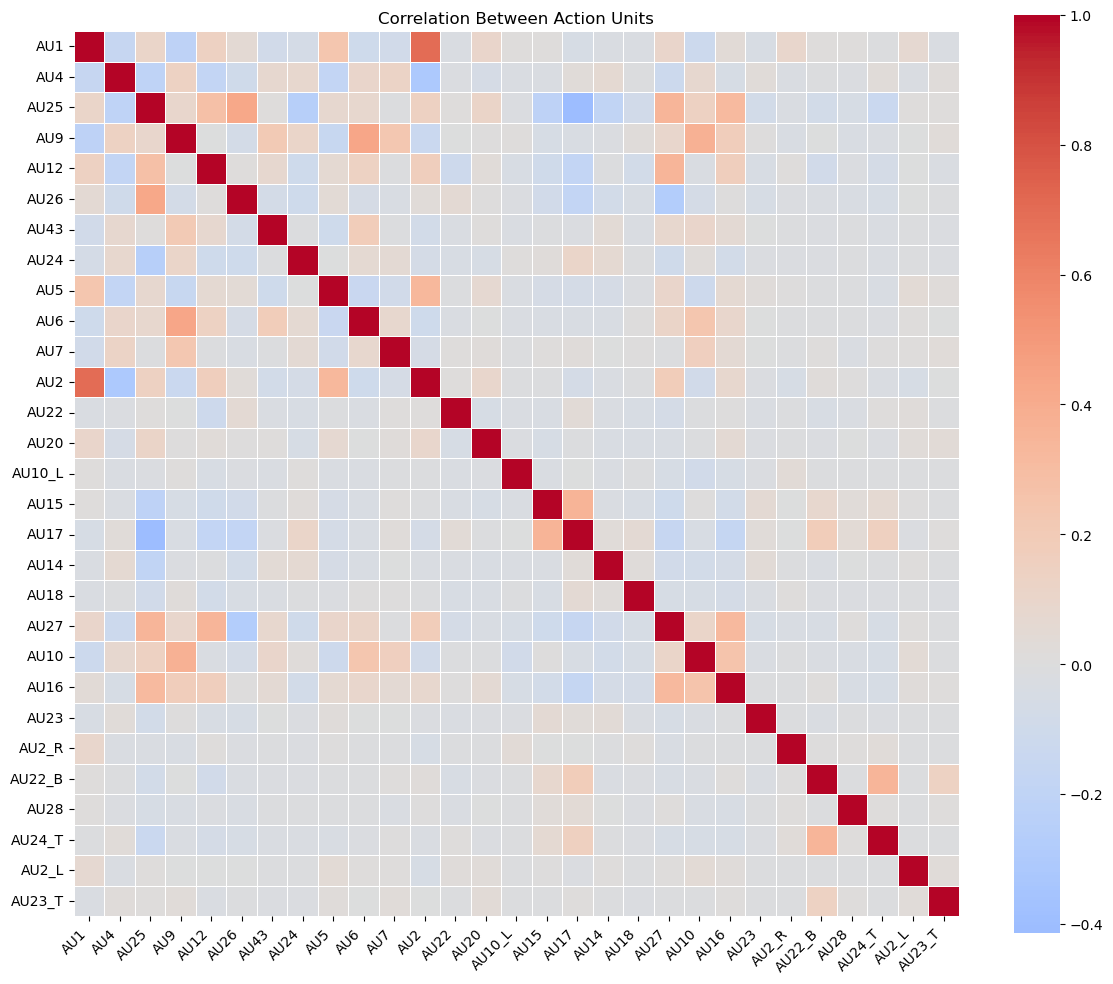

In [21]:
au_columns = [c for c in labels_fused_clean_df.columns if c != "image"]

corr = labels_fused_clean_df[au_columns].corr()

plt.figure(figsize=(12, 10)) 
ax = sns.heatmap(
    corr, 
    cmap="coolwarm", 
    center=0, 
    annot=False,
    square=True,      
    linewidths=0.5    
)

plt.title("Correlation Between Action Units")
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

In [22]:
import numpy as np
corr_pairs = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))  # upper triangle only
corr_pairs = corr_pairs.stack().reset_index()
corr_pairs.columns = ['AU1', 'AU2', 'correlation']

# Sort by absolute correlation to get the strongest correlations
corr_pairs['abs_corr'] = corr_pairs['correlation'].abs()
corr_pairs_sorted = corr_pairs.sort_values(by='abs_corr', ascending=False)

# Display top N correlated AU pairs
top_n = 20
print(corr_pairs_sorted.head(top_n))

        AU1     AU2  correlation  abs_corr
10      AU1     AU2     0.701667  0.701667
86      AU9     AU6     0.432094  0.432094
57     AU25    AU26     0.425612  0.425612
68     AU25    AU17    -0.412916  0.412916
97      AU9    AU10     0.372207  0.372207
315    AU15    AU17     0.352260  0.352260
120    AU12    AU27     0.348133  0.348133
71     AU25    AU27     0.346795  0.346795
397  AU22_B  AU24_T     0.344622  0.344622
198     AU5     AU2     0.327565  0.327565
362    AU27    AU16     0.325365  0.325365
73     AU25    AU16     0.316548  0.316548
37      AU4     AU2    -0.312006  0.312006
143    AU26    AU27    -0.275663  0.275663
56     AU25    AU12     0.273796  0.273796
59     AU25    AU24    -0.256706  0.256706
370    AU10    AU16     0.252481  0.252481
226     AU6    AU10     0.236038  0.236038
7       AU1     AU5     0.233570  0.233570
87      AU9     AU7     0.232690  0.232690


The strongest correlation (AU1 & AU2, r=0.7) aligns with the physiological tendency to raise the entire brow during Surprise and Fear.

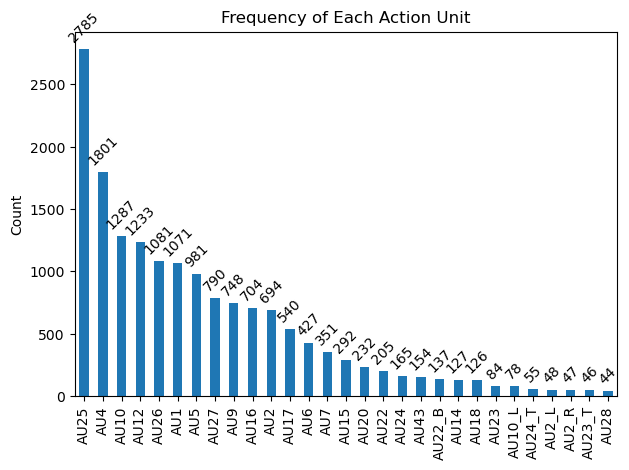

In [34]:
au_frequencies = labels_fused_clean_df[au_columns].sum().sort_values(ascending=False)

ax = au_frequencies.plot(kind="bar")

ax.bar_label(ax.containers[0], padding=3, rotation=45)
plt.title("Frequency of Each Action Unit")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [24]:
print(labels_fused_clean_df.shape)

(4291, 29)


There are several images that have either null AUs or were deleted from the dataframe due to the dropping of several columns so we will need to adjust the compound emotion dataframe and the available dataset

In [27]:
valid_indices = labels_fused_clean_df.index
compound_df_clean = compound_emotion_labels.loc[valid_indices].reset_index(drop=True)

# Also reset the AU dataframe index to be safe
labels_fused_clean_df = labels_fused_clean_df.reset_index(drop=True)
print("AU df shape:", labels_fused_clean_df.shape)
print("Compound df shape:", compound_df_clean.shape)
print(labels_fused_clean_df.columns)

AU df shape: (4291, 29)
Compound df shape: (4291, 2)
Index(['AU1', 'AU4', 'AU25', 'AU9', 'AU12', 'AU26', 'AU43', 'AU24', 'AU5',
       'AU6', 'AU7', 'AU2', 'AU22', 'AU20', 'AU10_L', 'AU15', 'AU17', 'AU14',
       'AU18', 'AU27', 'AU10', 'AU16', 'AU23', 'AU2_R', 'AU22_B', 'AU28',
       'AU24_T', 'AU2_L', 'AU23_T'],
      dtype='object')


In [42]:
# Keep only AU columns from labels_fused_clean_df + 'image'
au_columns_cleaned = list(labels_fused_clean_df.columns)  # these are already fused/dropped
au_features_clean = au_features[['image']].copy()  # start with image column

# Add the cleaned AU columns from labels_fused_clean_df
au_features_clean[au_columns_cleaned] = labels_fused_clean_df[au_columns_cleaned]
"""
deleted_count = 0
for img_file in os.listdir(img_dir):
    if img_file not in valid_images:
        os.remove(os.path.join(img_dir, img_file))
        deleted_count += 1

print(f"Deleted {deleted_count} images that were no longer needed.")"""

'\ndeleted_count = 0\nfor img_file in os.listdir(img_dir):\n    if img_file not in valid_images:\n        os.remove(os.path.join(img_dir, img_file))\n        deleted_count += 1\n\nprint(f"Deleted {deleted_count} images that were no longer needed.")'

In [43]:

output_path = "../data/au_features_clean.csv"
au_features_clean.to_csv(output_path, index=False)
print(f"Saved cleaned dataframe to {output_path}")

Saved cleaned dataframe to ../data/au_features_clean.csv


In [87]:
output_path = "../data/compound_df_clean.csv"
compound_df_clean.to_csv(output_path, index=False)
print(f"Saved cleaned dataframe to {output_path}")

Saved cleaned dataframe to ../data/compound_df_clean.csv
